In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# toRGB = lambda x: (x // 256 // 256 % 256, x // 256 % 256, x % 256)
# toInt = lambda r, g, b: (r*256**2) + (g*256) + b
max_val = 16777215

In [3]:
data = np.load("test-mask.npy")
print(data.shape)
data.dtype

(15, 480, 640)


dtype('float32')

In [4]:
def masks_to_image(masks):
    # shape of masks should be (H, W, N)
    # toRGB = lambda x: (x // 256 // 256 % 256, x // 256 % 256, x % 256)
    toRGB = lambda x: (x >> 16 & 255, x >> 8 & 255, x & 255)
    max_val = 16777215

    step = max_val // (masks.shape[2])
    img = np.full((masks.shape[0], masks.shape[1], 3), fill_value=0, dtype=np.int32)
    
    for i in range(1, masks.shape[2] + 1):
        img[masks[:, :, i - 1] == 1] = toRGB(i * step)

    return img # (H, W, C)

def image_to_mask(img, num_masks):
    # img shape should be (H, W, C) and type should be int
    img = img.astype(np.int32)

    step = max_val // num_masks
    return ((img[:, :, 0] * 256 * 256 + img[:, :, 1] * 256 + img[:, :, 2]) // step) - 1

def image_to_masks(img, num_masks):
    # img shape should be (H, W, C) and type should be int
    img = img.astype(np.int32)

    m = image_to_mask(img, num_masks)
    masks = np.full((num_masks, m.shape[0], m.shape[1]), fill_value=0, dtype=np.int32)

    for i in range(num_masks):
        masks[i, m == i] = 1

    return masks # (N, H, W)

    

(480, 640, 3)


True

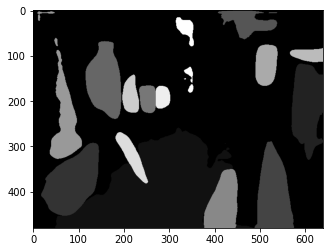

In [5]:
data_channels_last = data.transpose(1, 2, 0)
img = masks_to_image(data_channels_last)
print(img.shape)
plt.imshow(img)
cv2.imwrite("seg.png", img)

In [6]:
# getting original data back from image data
calc_masks = image_to_masks(img, 15) # 15: number of planes
print(calc_masks.shape)
(calc_masks == data).all()

(15, 480, 640)


True

(480, 640)


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int32)

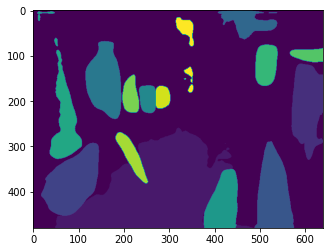

In [7]:
# generating single channel mask to be used in planercnn
mask = image_to_mask(img, 15) # 15: number of planes
print(mask.shape)
plt.imshow(mask * (255//15))
np.unique(mask)

In [8]:
# getting original data back from image file
seg_img = cv2.imread("seg.png")
seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2RGB)
print(seg_img.shape)
calc_masks_from_file = image_to_masks(seg_img, 15)
print(calc_masks_from_file.shape)
(calc_masks_from_file == data).all()

(480, 640, 3)
(15, 480, 640)


True

(480, 640)


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int32)

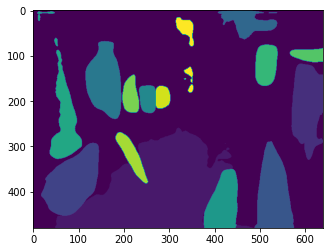

In [9]:
# generating single channel mask to be used in planercnn
mask = image_to_mask(seg_img, 15) # 15: number of planes
print(mask.shape)
plt.imshow(mask * (255//15))
np.unique(mask)